# Midterms Questions & Answers

1. ***What have you learned?*** I now have a better understanding of how to perform k-means clustering and the importance of selecting the optimal number of clusters using various methods, such as the Elbow method, Calinski-Harabasz index, and Davies-Bouldin index. I also learned how to apply PCA to reduce dimensionality for visualizing clusters in a 2D scatter plot.

2. ***What are the challenges?*** One of the challenges I faced was determining the appropriate k value. I also initially struggled to understand PCA, but through experimentation, I gained a working understanding and identified the necessary features for implementing salary segmentation.

3. ***How can clustering results from k-means be integrated into the decision-making process in business analytics?*** Clustering results can be integrated into various business decisions. A common application is customer segmentation, which groups customers based on their purchasing habits. My implementation demonstrates salary/employee segmentation, using features such as salary, experience, and job role.

4. ***How can K-means clustering be used in your chosen datasets?*** In my implementation, k-means helped identify distinct employee segments based on a combination of salary, experience, job role, education, and location. This information can be used to develop targeted compensation strategies. Understanding the typical salary ranges for different employee segments can inform fair and competitive compensation practices.

5. ***Generate possible research ideas/title:*** Potential research topics include "Enhancing the Interpretability of k-means Clusters in Salary Analysis by Integrating Feature Importance Measures" (exploring methods to determine which features contribute most to cluster separation) and "A Comparison of k-means and [Other Clustering Algorithms, e.g., Gaussian Mixture Models, DBSCAN] for Employee Segmentation Based on Salary and Performance Data" (exploring alternative clustering approaches).

# Table of Contents

[Overview](#scrollTo=OvpuZD2Xb7YV)

[Mount drive](#scrollTo=gUtTcMXMdb2a)

[Import necessary libraries](#scrollTo=FRc7nfEWdg8O)

[Data Loading and Initial Inspection:](#scrollTo=gDEGXlARd9kD)

[Exploratory Data Analysis (EDA)](#scrollTo=-d8IwEcNeW_i)

[Feature Encoding](#scrollTo=9y0LGpvSfDt9)

[Feature Scaling](#scrollTo=7Jj7O5L7gU4S)

[Dimensionality Reduction with PCA:](#scrollTo=a0Fr20-jgbLu)

[Choosing the optimal number of clusters (k) using the Elbow Method, Calinski-Harabasz index, and Davies-Bouldin index.](#scrollTo=vHT0xg7jgwOH)

>[Elbow Method](#scrollTo=PH63_PObg8Po)

>[Calinski-Harabasz Index:](#scrollTo=ki-8yo3zhEn5)

>[Davies-Bouldin index](#scrollTo=2BiXnwEOhgAW)

>[K-Means Model Initialization:](#scrollTo=YYVYvaKIibkI)

[Visualizing Employee Clusters in PCA Space](#scrollTo=LGznQbAIihXn)

[Cluster Summary](#scrollTo=_xrCieoZjqa6)

[Cluster Count](#scrollTo=LL7fW6NbjwpN)

[Analyzing Original Categorical Features within Clusters](#scrollTo=CAjd1YRvj5N6)



## Overview

This notebook demonstrates the use of K-Means clustering to segment employees based on synthetic salary data. It covers data preprocessing, optimal k selection using multiple evaluation metrics (Elbow Method, Calinski-Harabasz, Davies-Bouldin), cluster analysis, and interpretation of results.



## Mount drive

In [472]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import necessary libraries

In [473]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

## Data Loading and Initial Inspection:

The analysis began by loading the tech salaries dataset from a CSV file, the dataset came from [kaggle](https://www.kaggle.com/datasets/haricharanlinga/tech-company-salaries)

In [474]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/tech_salaries.csv')
df.head()

,Employee_ID,Full_Name,Gender,Age,Job_Role,Years_Experience,Education,Office_Location,Salary,Performance_Score,Is_Manager,Department,Hire_Date
0,EMP-10000,James Warren,Non-Binary,29,Software Engineer,17,Associate Degree,"Seattle, WA",121878,1,0,Engineering,2006-07-22
1,EMP-10001,Kimberly Holland,Non-Binary,27,Engineering Manager,27,High School,"San Francisco, CA",190483,2,1,Engineering,2010-08-03
2,EMP-10002,Gregory Fitzgerald,Male,54,Engineering Manager,1,PhD,"Seattle, WA",191426,4,1,Engineering,2015-11-04
3,EMP-10003,John Jordan,Male,50,Engineering Manager,17,High School,"Austin, TX",217486,3,1,Engineering,2012-05-27
4,EMP-10004,Cameron Anderson,Female,31,UI/UX Designer,21,High School,"New York, NY",125265,1,0,General,2015-05-07


## Exploratory Data Analysis (EDA)

EDA was performed on the tech salaries dataset. The data was loaded into a Pandas DataFrame, and df.head() provided an initial view of the data. df.info() revealed **100,000 entries** with **13 columns** (5 numerical and 8 categorical), with no missing values. Descriptive statistics using df.describe() showed an average age of 43.6, 20 years of experience, a mean salary of $146,193.65, an average performance score of 3, and 21% managers.

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Employee_ID        100000 non-null  object
 1   Full_Name          100000 non-null  object
 2   Gender             100000 non-null  object
 3   Age                100000 non-null  int64 
 4   Job_Role           100000 non-null  object
 5   Years_Experience   100000 non-null  int64 
 6   Education          100000 non-null  object
 7   Office_Location    100000 non-null  object
 8   Salary             100000 non-null  int64 
 9   Performance_Score  100000 non-null  int64 
 10  Is_Manager         100000 non-null  int64 
 11  Department         100000 non-null  object
 12  Hire_Date          100000 non-null  object
dtypes: int64(5), object(8)
memory usage: 9.9+ MB


In [476]:
df.describe()

,Age,Years_Experience,Salary,Performance_Score,Is_Manager
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,43.565580,19.999230,146193.652340,3.001250,0.211100
std,12.701411,11.798986,49871.619797,1.413771,0.408091
min,22.000000,0.000000,50000.000000,1.000000,0.000000
25%,33.000000,10.000000,108460.750000,2.000000,0.000000
50%,44.000000,20.000000,139226.500000,3.000000,0.000000
75%,55.000000,30.000000,176702.250000,4.000000,0.000000
max,65.000000,40.000000,339654.000000,5.000000,1.000000


In [477]:
df.isna().sum()

,0
Employee_ID,0
Full_Name,0
Gender,0
Age,0
Job_Role,0
Years_Experience,0
Education,0
Office_Location,0
Salary,0
Performance_Score,0


In [478]:
df.nunique()

,0
Employee_ID,100000
Full_Name,71007
Gender,3
Age,44
Job_Role,12
Years_Experience,41
Education,5
Office_Location,10
Salary,75729
Performance_Score,5


## Feature Encoding

To prepare categorical features for the k-means algorithm, which requires numerical input, Label Encoding was applied. This involved using LabelEncoder from sklearn.preprocessing to transform the categorical columns 'Job_Role', 'Education', and 'Office_Location' into numerical representations.

In [479]:
le_job_role = LabelEncoder()
df['Job_Role_Encoded'] = le_job_role.fit_transform(df['Job_Role'])

le_education = LabelEncoder()
df['Education_Encoded'] = le_education.fit_transform(df['Education'])

le_location = LabelEncoder()
df['Office_Location_Encoded'] = le_location.fit_transform(df['Office_Location'])

features = ['Salary', 'Years_Experience', 'Job_Role_Encoded', 'Education_Encoded', 'Office_Location_Encoded']
X = df[features]

## Feature Scaling

Feature scaling was performed using StandardScaler from sklearn.preprocessing. This standardized the numerical features `('Salary', 'Years_Experience', 'Job_Role_Encoded', 'Education_Encoded', 'Office_Location_Encoded')` by transforming them to have zero mean and unit variance.

In [480]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Dimensionality Reduction with PCA:

To visualize the clusters in a two-dimensional space, Principal Component Analysis (PCA) was applied using PCA from sklearn.decomposition. PCA reduces the dimensionality of the scaled data `(X_scaled)` to two principal components `(X_pca)`, capturing the most significant variance in the data while enabling visualization in a scatter plot. `n_components=2` was used to reduce the data to two dimensions.

In [481]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Choosing the optimal number of clusters (k) using the Elbow Method, Calinski-Harabasz index, and Davies-Bouldin index.

### Elbow Method

The Elbow Method was used to determine the optimal number of clusters (k). This involved iterating through a range of k values (from 1 to 10).

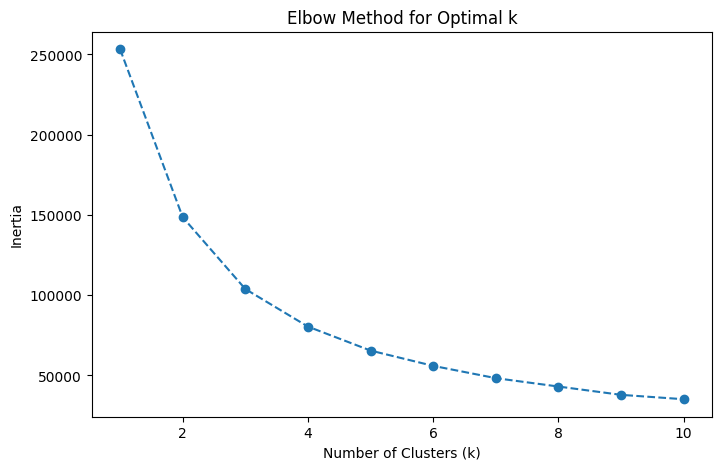

In [482]:
inertia = []
range_k = range(1, 11)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_k, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### Calinski-Harabasz Index:

Calinski-Harabasz Index was used to evaluate the quality of clustering. This metric measures the ratio of between-cluster variance to within-cluster variance.

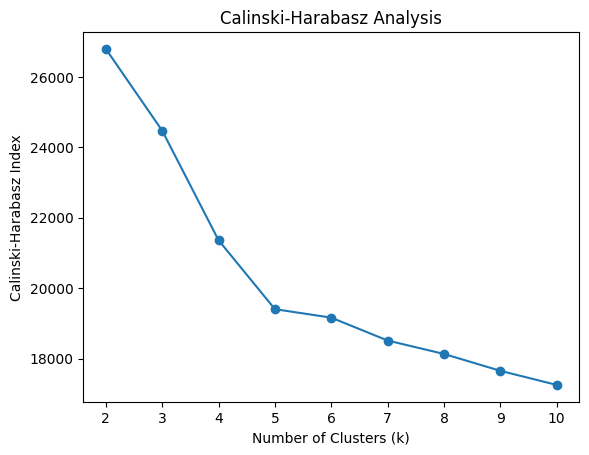

In [483]:
ch_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = calinski_harabasz_score(X_scaled, labels)
    ch_scores.append(score)

plt.plot(range(2, 11), ch_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Analysis')
plt.show()

### Davies-Bouldin index

The Davies-Bouldin index was used to assess the quality of clustering. This metric measures the average similarity between each cluster and its most similar cluster.

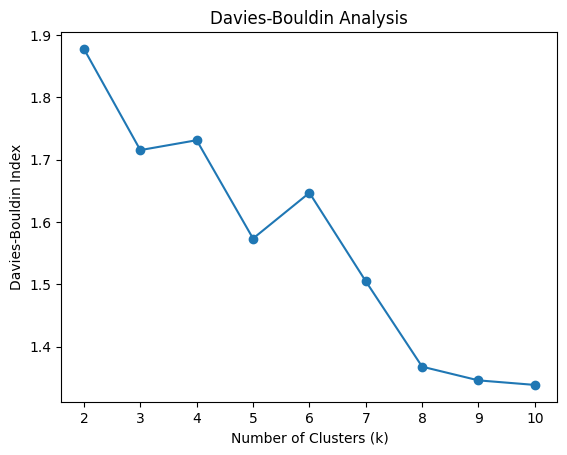

In [484]:
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = davies_bouldin_score(X_scaled, labels)
    db_scores.append(score)

plt.plot(range(2, 11), db_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Analysis')
plt.show()

## K-Means Model Initialization:

his section performs the K-Means clustering using the optimal number of clusters `(k_optimal)`, fits the model to the PCA-reduced data `(X_pca)`, and then adds the resulting cluster assignments as a new column `('Cluster')` to the original DataFrame `(df)`.

In [485]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_pca)

df['Cluster'] = kmeans.labels_

## Visualizing Employee Clusters in PCA Space

This section presents a visualization of the employee clusters generated by the K-Means algorithm. Since the original data has multiple dimensions (features), Principal Component Analysis (PCA) was used to reduce the data to two dimensions for plotting. The resulting scatter plot shows:

*   **Data Points:** Each point represents an employee, plotted according to its coordinates on the first two principal components.
*   **Cluster Coloring:** The color of each point indicates the cluster to which it belongs, as determined by the K-Means algorithm. A distinct colormap ('Set2' in this case) is used to ensure clear visual separation between clusters.
*   **Cluster Centroids:** The centroids of each cluster are plotted as red stars. These represent the average location of the data points within each cluster in the PCA space.
*   **Cluster Annotations:** Each centroid is annotated with a text box displaying the average salary and average years of experience for the employees within that cluster. This provides additional context and helps interpret the characteristics of each segment.

This visualization allows us to observe the separation and distribution of the employee clusters in the reduced PCA space and understand the general characteristics of each segment.

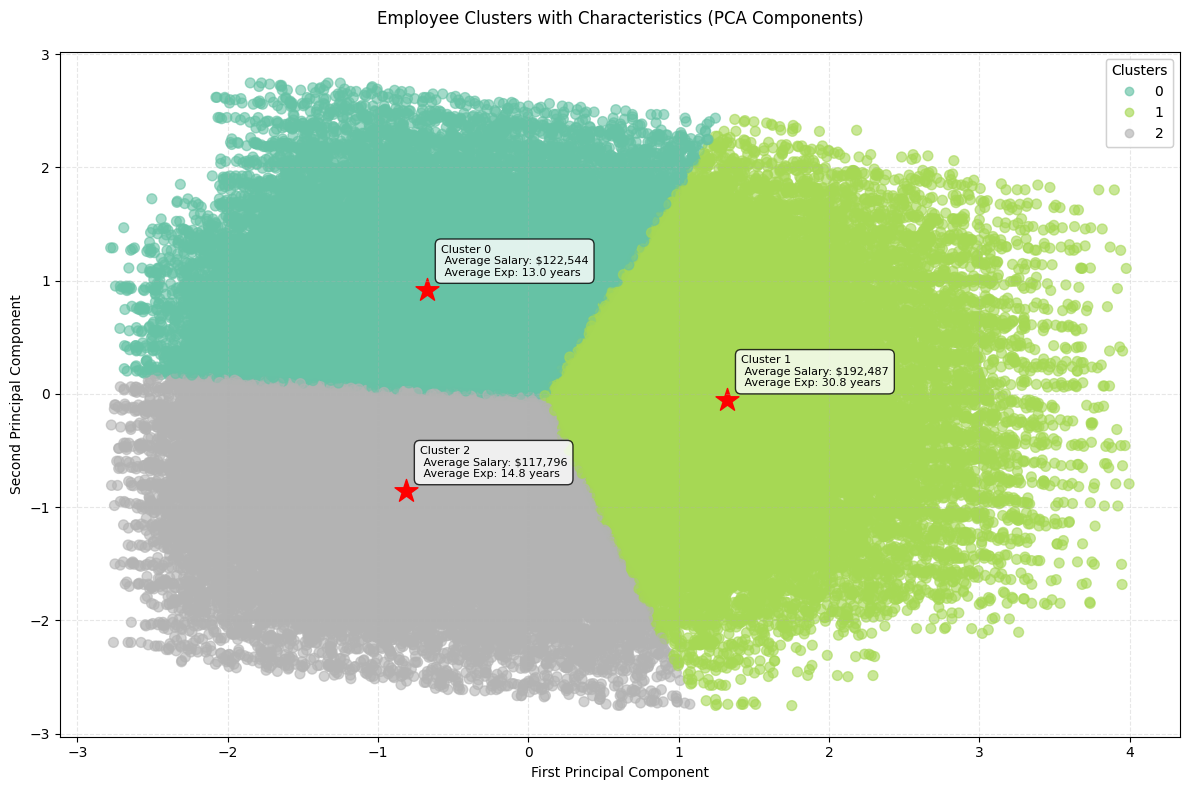

In [486]:
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=kmeans.labels_,
    cmap='Set2',
    alpha=0.6,
    s=50
)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    marker='*',
    s=300,
    label='Centroids'
)

# Calculate cluster characteristics
cluster_characteristics = []
for i in range(k_optimal):
    cluster_mask = df['Cluster'] == i
    avg_salary = df[cluster_mask]['Salary'].mean()
    avg_exp = df[cluster_mask]['Years_Experience'].mean()

    # Create cluster label based on characteristics
    label = f'Cluster {i}\n Average Salary: ${avg_salary:,.0f}\n Average Exp: {avg_exp:.1f} years'

    # Add annotation for each centroid
    plt.annotate(
        label,
        (centroids[i, 0], centroids[i, 1]),
        xytext=(10, 10),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
        fontsize=8
    )

# Customize the plot
plt.title('Employee Clusters with Characteristics (PCA Components)', pad=20)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add legend for the scatter points
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout to prevent label clipping
plt.tight_layout()

plt.show()

## Cluster Summary

This table shows the mean values of the features for each of the three clusters identified by the k-means algorithm. These are the means of the encoded categorical features, which makes direct interpretation challenging without knowing the encoding mapping.


1. **Cluster 1:** Has the highest average salary ($192,487) and the highest average years of experience (30.8). This strongly suggests this cluster represents senior, highly compensated employees.

2. **Cluster 0:** Has a mid-range average salary ($122,544) and mid-range average experience (13.0). This likely represents mid-level employees.

3. **Cluster 2:** Has the lowest average salary ($117,795) and slightly higher average experience (14.8) than Cluster 0. This is an interesting observation that requires further investigation.

---

### Office Location:

1. Cluster 2: Has the highest average `Office_Location_Encoded` value (5.69).
2. Cluster 1: Has a mid-range average `Office_Location_Encoded` value (4.53).
3. Cluster 0: Has the lowest average `Office_Location_Encoded` value (3.25).

The `Office_Location_Encoded` values provide a strong explanation for the salary difference between Clusters 0 and 2. Since Cluster 2 has the highest average encoded location value, this suggests they are located in offices that, on average, pay less. This is perfectly reasonable since cost of living and average salaries can vary significantly between different cities or regions.



In [487]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

                Salary  Years_Experience  Job_Role_Encoded  Education_Encoded  \
Cluster                                                                         
0        122544.175407         13.014442          4.446836           2.956078   
1        192487.117529         30.805813          4.722736           1.946848   
2        117795.858643         14.826576          7.416996           1.119075   

         Office_Location_Encoded  
Cluster                           
0                       3.251159  
1                       4.528354  
2                       5.686590  


## Cluster Count

The output shows a table where the index represents the cluster labels (0, 1, 2), and the values represent the number of data points assigned to each cluster. This tells you the size of each cluster.

In [488]:
cluster_counts = df['Cluster'].value_counts()
cluster_counts

,count
Cluster,
1,35991
2,32089
0,31920


## Analyzing Original Categorical Features within Clusters

This code analyzes the distribution of the original categorical features (Job_Role, Education, Office_Location) within each cluster. This is crucial because the previous summary only showed the means of the encoded features, which are harder to interpret directly.

In [489]:
for i in range(3):  # Loop through 3 clusters
    print(f"Cluster {i}:")
    print("Job Roles:")
    print(df[df['Cluster'] == i]['Job_Role'].value_counts())
    print("Education:")
    print(df[df['Cluster'] == i]['Education'].value_counts())
    print("Office Locations:")
    print(df[df['Cluster'] == i]['Office_Location'].value_counts())
    print("-" * 20)

Cluster 0:
Job Roles:
Job_Role
Business Analyst             4549
Data Analyst                 4528
Data Scientist               3118
DevOps Engineer              3038
QA Engineer                  2648
Sales Engineer               2399
Machine Learning Engineer    2183
Product Manager              2092
Engineering Manager          2065
Technical Support            2032
Software Engineer            1829
UI/UX Designer               1439
Name: count, dtype: int64
Education:
Education
PhD                  12667
Master's Degree       9637
High School           6086
Bachelor's Degree     2607
Associate Degree       923
Name: count, dtype: int64
Office Locations:
Office_Location
Austin, TX           5441
Berlin, DE           4914
Boston, MA           4462
London, UK           3853
New York, NY         3334
San Francisco, CA    2897
Seattle, WA          2433
Sydney, AU           1878
Tokyo, JP            1557
Toronto, CA          1151
Name: count, dtype: int64
--------------------
Cluster 1:
J